In [2]:
from ete3 import Tree, TreeStyle, Tree, TextFace, CircleFace, NodeStyle, add_face_to_node
import time
%load_ext autoreload
%autoreload 2

In [3]:
stack = []

In [4]:
def printSelectedGrow(root, node):   
    node.name += '(+)'
    print(root.get_ascii(show_internal=True))
    node.name = node.name[:-3]

def printSelectedUp(root, node):   
    node.name += '(>)'
    print(root.get_ascii(show_internal=True))
    node.name = node.name[:-3]
    
def printSelectedDown(root, node):   
    node.name += '(<)'
    print(root.get_ascii(show_internal=True))
    node.name = node.name[:-3]

## Init

In [5]:
def init():
    stack = []

## Grow Phase

In [6]:
def grow(root, alphabet, demo = False):
    if alphabet:
        leafs = root.get_leaves()
        for leaf in leafs:
            if demo: printSelectedGrow(root, leaf)

            if leaf.name in alphabet.keys():  
                new_t = alphabet[leaf.name].copy("newick")
                leaf.add_child(new_t)

                #Add to the stack
                for node in new_t.traverse("levelorder"):
                    stack.append(node)
                    if demo: print(node)

                # delete extra ''            
                child = leaf.get_children()[0]
                if child.name == '':
                    child.delete()
    return root
        

## Transition Up

In [7]:
def transition_up(root, transitions, demo=False):
    if transitions:
        for node in root.traverse("levelorder"):
            if demo: printSelectedUp(root, node)
            stack.append(node)
            transitioned = False
            try:
                prev = node.get_ancestors()
                prev = prev[0]       
                node.name = transitions['-'.join([prev.name, node.name])] 
                if demo: print('-'.join([prev.name, node.name]))
                transitioned = True
            except:pass       
            if not transitioned:
                try:
                    node.name = transitions[node.name]
                    if demo: print('-'.join(['', node.name]))
                except:pass
    return root


## Transition Down

In [8]:
def find_child(node, target):
    for child in node.get_children():
        if target == child.name:
            return True
    return False
                    
def transition_down(root, transitions, demo=False):
    if transitions:
        while (len(stack) > 0):
            node = stack.pop()
            if demo: printSelectedDown(root, node)
            if node.name in transitions:
                for transition in transitions[node.name]:
                    tran = transition.split('-')
                    if tran[0] == '' or find_child(node, tran[0]):
                        node.name = tran[1]
                        if demo: print('-'.join([tran[0], tran[1]]))
                        break
    return root


                                

## Step

### Other Functions 

In [9]:
def countLayers(root):
    "counts how many nodes per layer"
    counts = {}
    for node in root.traverse("preorder"):
        depth = node.get_distance(root)
        if depth in counts.keys():
            counts[depth] += 1
        else:
            counts[depth] = 1
    return counts

def countNodes(root):
    "counts how many nodes per layer"
    counts = {}
    for node in root.traverse("preorder"):
        name = node.name
        if name in counts.keys():
            counts[name] += 1
        else:
            counts[name] = 1
    return counts

def countNodesPerLayer(root, name):
    "counts how many nodes per layer with a given name"
    counts = {}
    for node in root.traverse("preorder"):
        if node.name == name:
            depth = node.get_distance(root)
            if depth in counts.keys():
                counts[depth] += 1
            else:
                counts[depth] = 1
    return counts

def find_first_name(root, name):
    "Finds nodes with a given number of leaves"
    for n in root.traverse():
        if n.name == name:
            return n
    return None

def list2tree(node_list):  
    t = Tree()
    prev = t.add_child(name=node_list[0])
    for node_name in node_list[1:]:
        prev = prev.add_child(name=node_name)
    return t

def horzTree(name, num):
    t = Tree()
    for i in range(num):
        t.add_child(name = name)
    return t
    

In [7]:
a = list2tree(['1','2','3','4'])
print(a)


-- /- /- /- /-4


In [8]:
a = horzTree('1',6)
print(a)


   /-1
  |
  |--1
  |
  |--1
--|
  |--1
  |
  |--1
  |
   \-1


In [702]:
def checkEquality(a, b, verbose = False):
    itr_a = a.traverse("preorder");
    itr_b = b.traverse("preorder");
    for [node_a,node_b] in zip(itr_a, itr_b):
        if node_a and node_b:
            if not (node_a.name == node_b.name):
                if verbose: print(node_a.name, node_b.name)
                return False
#     try:itr_a.next()
#     except StopIteration:
#         try:itr_b.next()
#         except StopIteration:
#              return True
    if not any(itr_a) and not any(itr_b):
        return True
    else:
        if verbose: print('diff shape')
        return False
   
        
    

In [706]:
a = list2tree(['1','2','3','4','5','6'])
b = list2tree(['1','2','3','4','5'])
checkEquality(a,b,verbose=True)

True

In [635]:
b = a.traverse("preorder")

## Fibonacci

In [11]:
# Fibonacci
alphabet = {}
alphabet['A'] = Tree('(A,(A));')
print alphabet['A']

up_trans = None
down_trans = None


   /-A
--|
   \- /-A


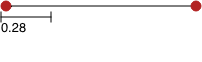

In [12]:
root = Tree('(A);')


def my_layout(node):
    
    nstyle = NodeStyle()
    nstyle["size"] = 10
    nstyle["fgcolor"] = "FireBrick"
    node.set_style(nstyle)

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout    

root.render("%%inline",tree_style = ts) 

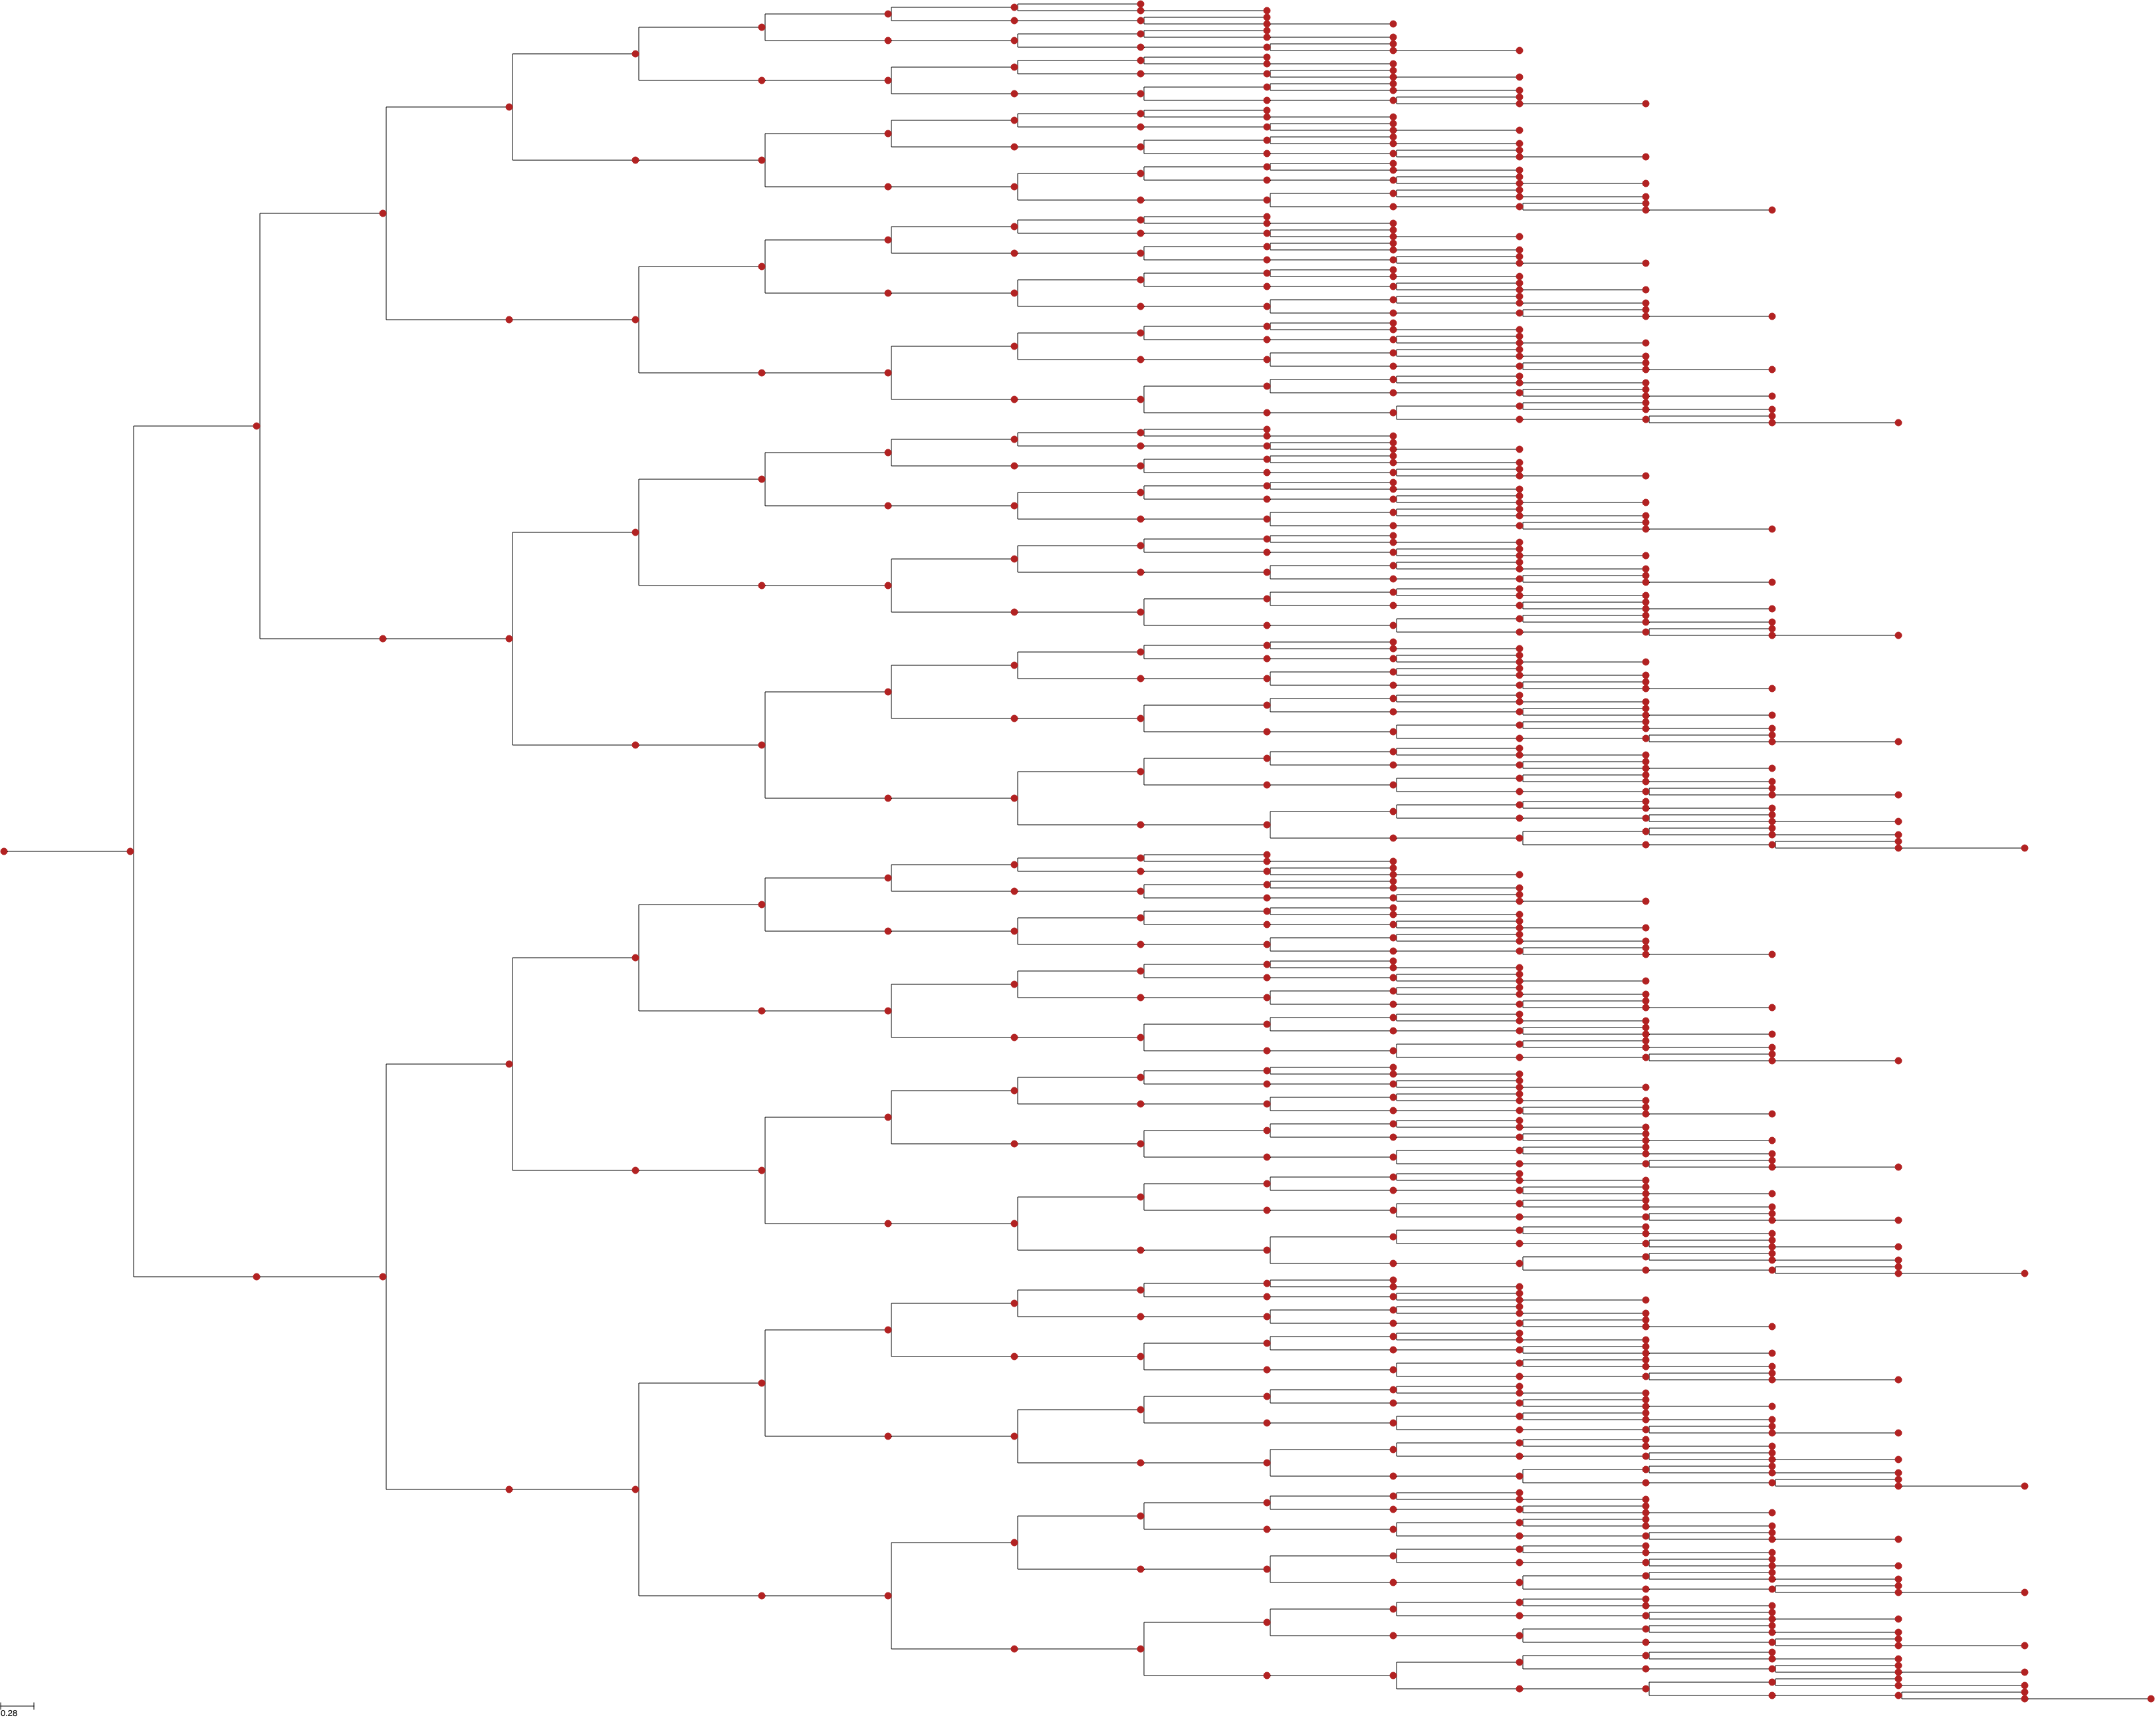

In [999]:
demo = False
transition_up(root,up_trans)
grow(root,alphabet,demo)
transition_down(root,down_trans)
print('\n\n')
if demo: printSelected(root, root)
root.render("%%inline",tree_style = ts) 

In [1000]:
countLayers(root)

{0.0: 1,
 1.0: 1,
 2.0: 2,
 3.0: 3,
 4.0: 5,
 5.0: 8,
 6.0: 13,
 7.0: 21,
 8.0: 34,
 9.0: 55,
 10.0: 87,
 11.0: 125,
 12.0: 148,
 13.0: 133,
 14.0: 85,
 15.0: 36,
 16.0: 9,
 17.0: 1}

# Cantor

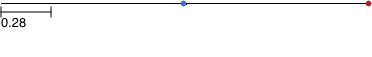

In [1001]:
# Cantor Set
alphabet['1'] = Tree('(1,0,1);')
alphabet['0'] = Tree('(0,0,0);')

up_trans = None
down_trans= None


root = Tree()
root.format = 100
a = root.add_child(name="1")

def my_layout(node):
    
    nstyle = NodeStyle()
    nstyle["size"] = 5
    if node.name == '1':
        nstyle["fgcolor"] = "FireBrick"
    else:
        nstyle["fgcolor"] = "RoyalBlue"
    node.set_style(nstyle)

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout

root.render("%%inline",tree_style = ts) 


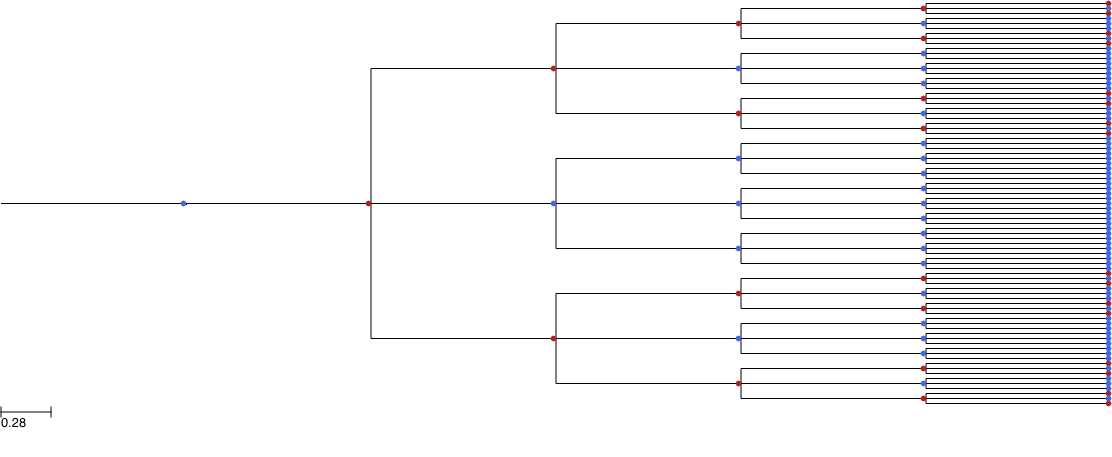

In [1005]:
demo = False
transition_up(root,up_trans,demo)
grow(root,alphabet,demo)
transition_down(root,down_trans,demo)
root.render("%%inline",tree_style = ts)
#root.show(tree_style=ts)
#print(t)


In [1006]:
root.show(tree_style=ts)

In [106]:
print(countNodesPerLayer(root,'1'))
print(countLayers(root))

{1.0: 1, 2.0: 2, 3.0: 4, 4.0: 8, 5.0: 16, 6.0: 32}
{0.0: 1, 1.0: 1, 2.0: 3, 3.0: 9, 4.0: 27, 5.0: 81, 6.0: 243}


## Multiply

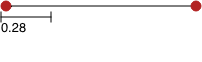

In [13]:
# Calculate A * B
A = 9
B = 7

alphabet = {}
alphabet['1st'] = horzTree('1',A)
alphabet['2nd'] = horzTree('1',B)

#Transitions
up_trans = {}
up_trans['1st-1'] = '2nd'

down_trans = {}

root = Tree('(1st);')

root.render("%%inline",tree_style = ts) 

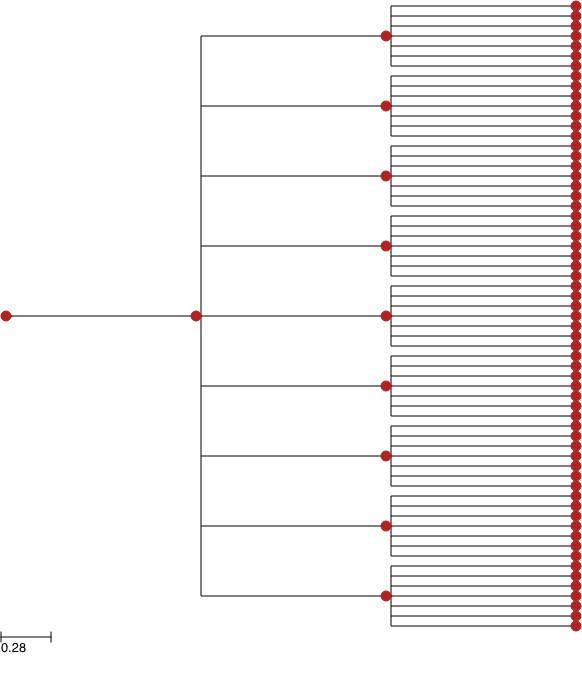

In [16]:
demo = False
transition_up(root,up_trans,demo)
grow(root,alphabet,demo)
transition_down(root,down_trans,demo)
root.render("%%inline",tree_style = ts) 

In [819]:
L = countLayers(root)
print('%d * %d = %d' %(A,B,L[3]))

5 * 7 = 35


# Subtract

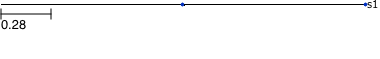

In [832]:
# Calculate A - B
A = 7
B = 2

alphabet = {}

t1 = Tree()
prev = t1.add_child(name="B")
for i in range(B):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="e1")


alphabet['s1'] = t1

t2 = Tree()
prev = t2.add_child(name="A")
for i in range(A):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="e2")

alphabet['e1'] = t2

#Transitions
up_trans = {}
up_trans['s**-1'] = '2'
up_trans['2'] = '3'
up_trans['3-1'] = '2'

up_trans['3-s**'] = 'D'
up_trans['D-3'] = 'D'
up_trans['D-2'] = 'D'

down_trans = {}
down_trans['B'] = ['-s*']
down_trans['s*'] = ['-s**']
down_trans['A'] = ['-s**']


root = Tree()
root.format = 100
a = root.add_child(name="s1")


def my_layout(node):
        F = TextFace(node.name, tight_text=True)
        add_face_to_node(F, node, column=0, position="branch-right")

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout
root.render("%%inline",tree_style = ts) 

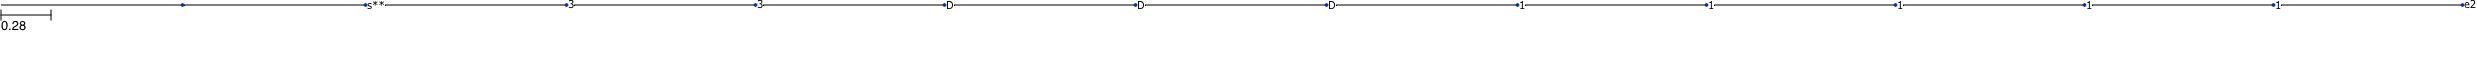

In [837]:
#Run
demo = False
transition_up(root,up_trans,demo)
grow(root,alphabet,demo)
transition_down(root,down_trans,demo)
root.render("%%inline",tree_style = ts)

7 - 2 = 5


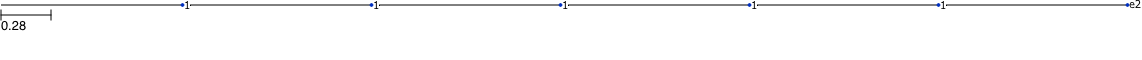

In [840]:
# Display ans
ans = find_first_name(root,'1')
print('%d - %d = %d' %(A,B,countNodes(root)['1']))
ans.render("%%inline",tree_style = ts) 


# Exponentiation

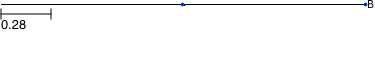

In [25]:
# Calculate A^B
A = 3
B = 6

alphabet = {}

tB = Tree()
prev = tB.add_child(name="B")
for i in range(B):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="eB")

alphabet['B'] = tB
alphabet['eB'] = list2tree(['eB','1'])
alphabet['1'] = horzTree('1',A)


#Transitions
up_trans = {}

up_trans['S-1'] = '2'
up_trans['2'] = '3'
up_trans['3-1'] = '2'

up_trans['2-eB'] = 'D'
up_trans['D-1'] = 'D'

down_trans = {}
down_trans['B'] = ['-B*']
down_trans['B*'] = ['-S']


root = Tree()
root.format = 100
a = root.add_child(name="B")



def my_layout(node):
        F = TextFace(node.name, tight_text=True)
        add_face_to_node(F, node, column=0, position="branch-right")

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout
root.render("%%inline",tree_style = ts) 

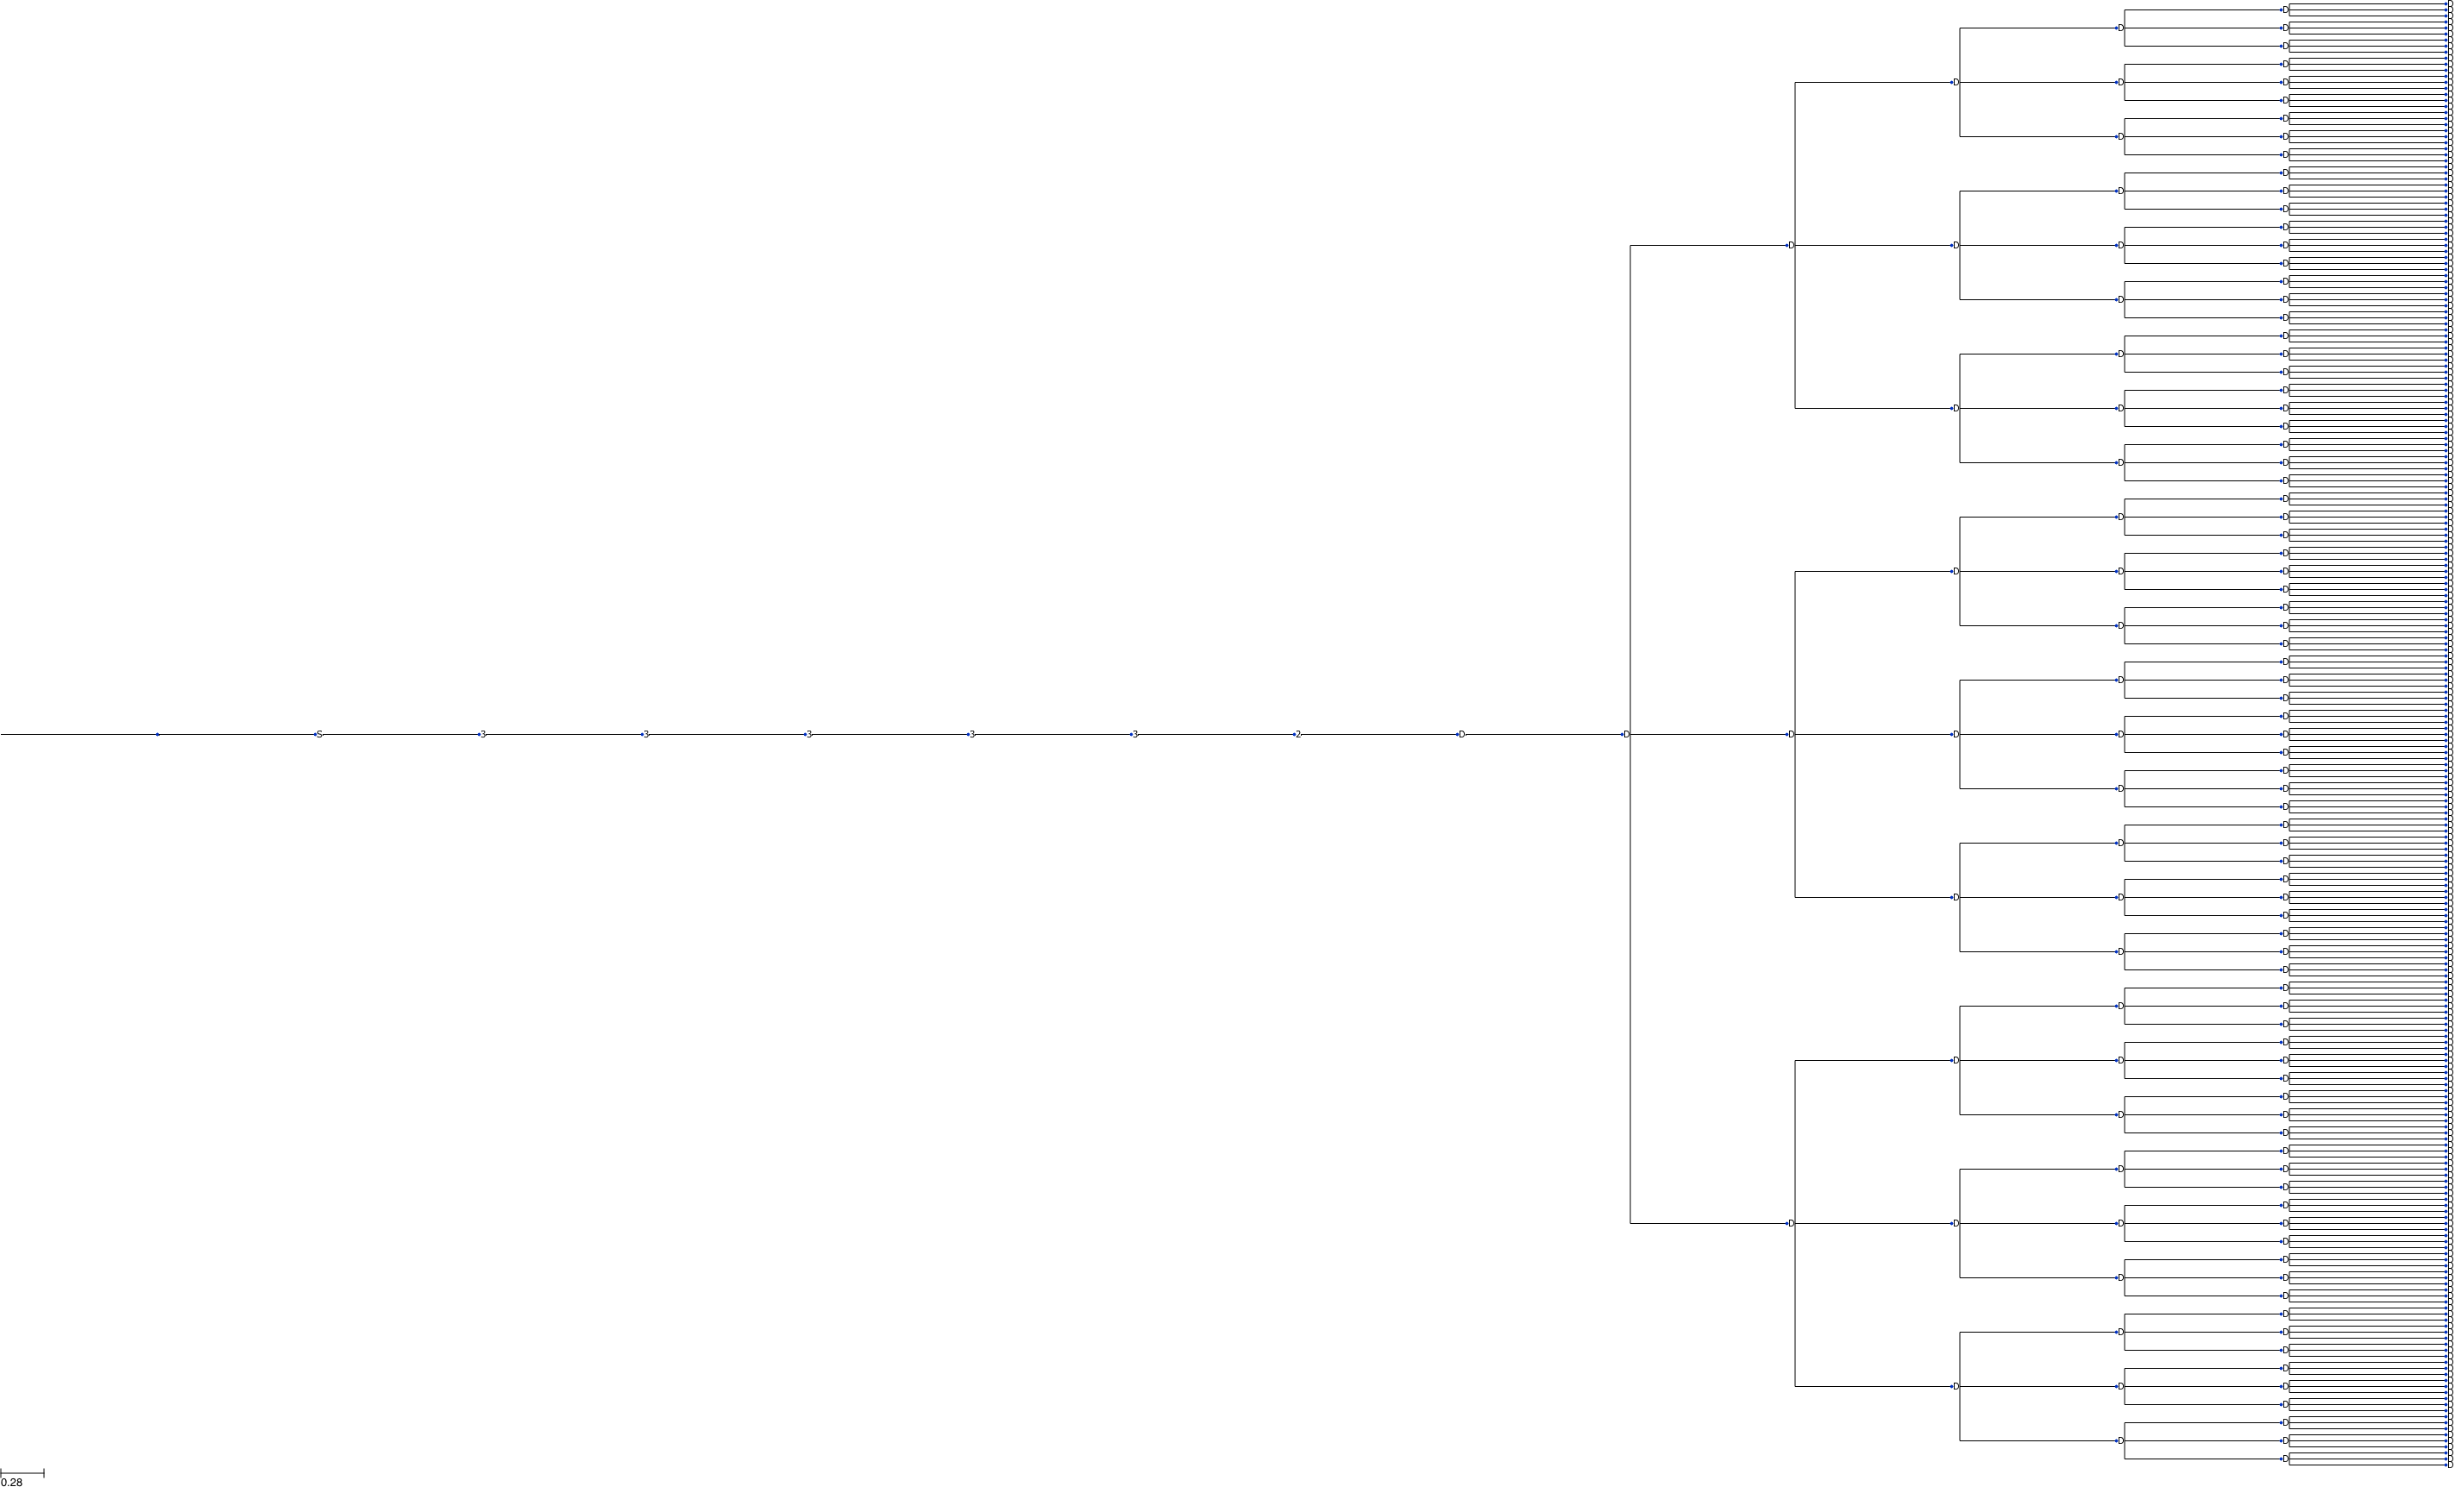

In [33]:
demo = False
transition_up(root,up_trans,demo)
grow(root,alphabet,demo)
transition_down(root,down_trans,demo)
root.render("%%inline",tree_style = ts)

In [34]:
# Print Ans
my_dict = countLayers(root)
print('%d ^ %d = %d' %(A,B,my_dict[my_dict.keys()[-1]]))


3 ^ 6 = 243


## Divide

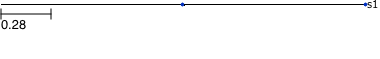

In [965]:
# Calculate A / B
A = 15
B = 3

alphabet = {}

tB = Tree()
prev = tB.add_child(name="B")
for i in range(B):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="e2")


alphabet['e1'] = tB

tA = Tree()
prev = tA.add_child(name="A")
for i in range(A):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="e1")


alphabet['s1'] = tA

ans = Tree()
a = ans.add_child(name="e2+")
a.add_child(name="1")
alphabet['e2+'] = ans

ans2 = Tree()
a = ans2.add_child(name="1+")
a.add_child(name="1")
alphabet['1+'] = ans2

#Transitions
up_trans = {}
up_trans['s**-1'] = '2'
up_trans['2'] = '3'
up_trans['3-1'] = '2'

up_trans['3-s**'] = 'D'
up_trans['D-3'] = 'D'
up_trans['D-2'] = 'D'

up_trans['2-e2'] = 'e2+'
up_trans['e2+-1'] = '1+'
up_trans['1+-1'] = '1+'

up_trans['s**-r'] = '2'
up_trans['2-r'] = '1'
up_trans['1-r'] = '1'


down_trans = {}
down_trans['A'] = ['-s*']
down_trans['s*'] = ['-s**']
down_trans['B'] = ['-s**']
down_trans['3'] = ['e2-r']
down_trans['2'] = ['e2-r']
down_trans['3'] = ['r-r']
down_trans['e2+'] = ['-e2']
down_trans['1+'] = ['-1']



root = Tree()
root.format = 100
a = root.add_child(name="s1")

old_root = Tree()


def my_layout(node):
        F = TextFace(node.name, tight_text=True)
        add_face_to_node(F, node, column=0, position="branch-right")

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout
root.render("%%inline",tree_style = ts) 

In [988]:
demo = False
transition_up(root,up_trans,demo)
grow(root,alphabet,demo)
root = transition_down(root,down_trans,demo)
root.render("%%inline",tree_style = ts)
ans = find_first_name(root,'1')
print('%d / %d = %d' %(A,B,countNodes(root)['1']))


15 / 3 = 5


15 / 5 = 3


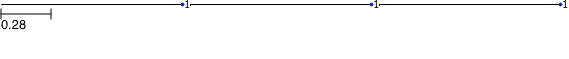

In [964]:
# Display ans
ans = find_first_name(root,'1')
print('%d / %d = %d' %(A,B,countNodes(root)['1']))
ans.render("%%inline",tree_style = ts) 


## Max

In [780]:
A = 3
B = 5

alphabet = {}

tB = Tree()
prev = tB.add_child(name="B")
for i in range(B):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="eB")

alphabet['B'] = tB
alphabet['eB'] = list2tree(['eB','1'])
alphabet['1'] = horzTree('1',A)
